# Linear Regression with Python without Scikit-Learn

### Step1 set up environment

In [7]:
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/11/17/fb1a34f3e73debbc2fd15a01ea17eaab3717943d08463ff4979a4f024b3f/pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     -------- ------------------------------ 71.7/341.8 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 5.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.6 MB 10.4 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/10.6 MB 10.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Step2 Read the data and create matrices

After install matplotlib and import matplotlib.pyplot,numpy,and pandas, we need to read the data and create matrices

In [16]:
data = np.genfromtxt('data.csv', delimiter=',')

In [23]:
"""1 tells numpy to figure out the dimension by itself, save the first column as an array 
to x.reshapge(-1,1) tells python to convert the array into a matrix with one column"""
x = data[:, 0].reshape(-1,1)

In [19]:
ones = np.ones([x.shape[0],1]) #create a array containing only ones

In [34]:
x = np.concatenate([ones, x],1) #concatenate the ones to x matrix

In [35]:
y = data[:,1].reshape(-1,1) # create the y matrix

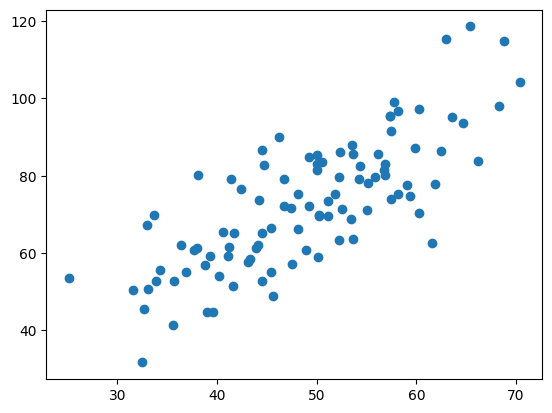

In [36]:
plt.scatter(data[:,0].reshape(-1,1),y)  # we can clearly see a linear trend

### Step3 Set the hyper parameters

Now define hyper parameters, such as learning rate and number of iterations, and initial theta values. theta values are the slope and intercept values of the line equation. i.e the values of m and c in the equation y = c + mx. In this case yhat = theta[0][0] + theta[0][1] * x

In [78]:
alpha = 0.0001  # small alpha value
iters = 2000
#theta is a row vector
theta = np.array([[1.0,1.0]])

### Step4 Create the cost function

Here computeCost function takes x,y and theta as parameters and computes the cost."inner" calculates the dot product of x and theta raise to power 2. Then they are summed up and divided by 2*length of x and returned. The code is below:

In [79]:
def computeCost(x,y,theta):
    inner = np.power(((x @ theta.T) - y), 2) # @ means matrix multiplication of arrays.
    return np.sum(inner) / (2 * len(x))

In [80]:
computeCost(x,y,theta) 

319.40631589398157

### Step5 Create the Gradient Descent function

Here gradientDescent function is to find the optimum value for theta parameters so that the cost decreases.

In [81]:
def gradientDescent(x,y,theta,alpha,iters):
    for i in range(iters):
        theta = theta - (alpha/len(x)) * np.sum((x @ theta.T -y) * x, axis = 0)
        cost = computeCost(x,y,theta)
    return (theta,cost)

In [82]:
g, cost = gradientDescent(x,y,theta,alpha,iters)
print(g, cost)

[[1.06153444 1.45862797]] 56.03510649559432


### Step6 Another plot

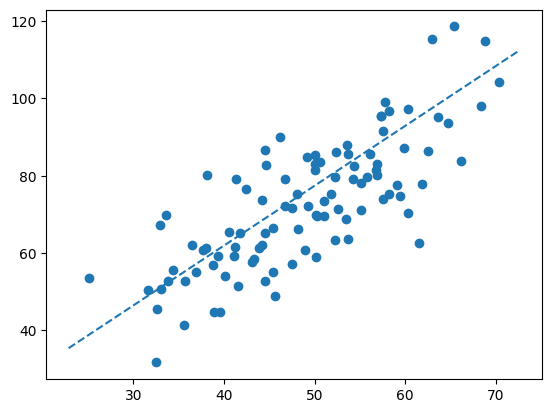

In [85]:
plt.scatter(data[:,0].reshape(-1,1),y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] * g[0][1] * x_vals  # the line equation
plt.plot(x_vals, y_vals, '--')

From the figure we can see the line is a perfect fit!